In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
electric = pd.read_csv("Full Eletric Interval 042016.csv")

In [3]:
electric['Datetime'] = pd.to_datetime(electric['Date'] + ' ' + electric['Start Time'])

In [4]:
propertyCode = pd.read_excel("SIMS_Property_List_4-6-2016_Revised.xlsx")

### List of codes

In [5]:
codelist = [b[0] for b in electric['Meter'].str.split()]

In [21]:
codes = pd.Series(codelist)

## Graph by code functions

In [6]:
def single_building(code):
    meterdf = electric[codes.isin([code])].groupby(by=['Datetime']).sum()
    meterdf = meterdf.reset_index()
    meterdf.plot(x='Datetime', y="Usage", figsize=(20, 10))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [7]:
def single_building_weekday(code):
    meterdf = electric[codes.isin([code])].groupby(by=['Datetime']).sum()
    meterdf = meterdf.reset_index()
    meterdf.Datetime = meterdf.Datetime.dt.weekday
    meterdf = meterdf.groupby(by=['Datetime']).mean()
    meterdf.plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [8]:
def single_building_time(code):
    meterdf = electric[codes.isin([code])].groupby(by=['Datetime']).sum()
    meterdf = meterdf.reset_index()
    meterdf.Datetime = meterdf.Datetime.dt.time
    meterdf = meterdf.groupby(by=['Datetime']).mean()
    meterdf.plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [9]:
def single_building_month(code):
    meterdf = electric[codes.isin([code])].groupby(by=['Datetime']).sum()
    meterdf = meterdf.reset_index()
    meterdf.Datetime = meterdf.Datetime.dt.month
    meterdf = meterdf.groupby(by=['Datetime']).mean()
    meterdf.plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [10]:
def single_building_meters(code):
    electric[codes.isin([code])].groupby(by='Meter').plot(x='Datetime', y='Usage', figsize=(20,10))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [11]:
def single_building_meters_overlay(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])].groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf = meterdf[(meterdf.index >= start) & (meterdf.index <= end)]
    meterdf.plot(y='Usage', figsize=(20,10))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [12]:
def single_building_meters_stack(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])].groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf = meterdf[(meterdf.index >= start) & (meterdf.index <= end)]
    meterdf.plot(y='Usage', figsize=(20,10), stacked=True)
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [13]:
def single_building_meters_weekday(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.weekday
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean()
    meterdf.groupby(by='Meter').plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [14]:
def single_building_meters_time(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.time
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean()
    meterdf.groupby(by='Meter').plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [15]:
def single_building_meters_month(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.month
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean()
    meterdf.groupby(by='Meter').plot.bar(y='Usage', figsize=(20,3))
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [16]:
def building_meters_weekday_stack(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.weekday
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf.plot.bar(y='Usage', figsize=(20,3), stacked=True)
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [17]:
def building_meters_time_stack(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.time
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf.plot.bar(y='Usage', figsize=(20,3), stacked=True)
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [18]:
def building_meters_month_stack(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.month
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf.plot.bar(y='Usage', figsize=(20,3), stacked=True)
    plt.ylabel('Usage (kWh)')
    plt.title(code)

In [19]:
def building_meters_date_stack(code, start='2014-04-11 23:30:00', end='2016-04-10 23:30:00'):
    meterdf = electric[codes.isin([code])]
    meterdf = meterdf[(meterdf.Datetime >= start) & (meterdf.Datetime <= end)]
    meterdf.Datetime = meterdf.Datetime.dt.date
    meterdf = meterdf.groupby(by=['Meter', 'Datetime']).mean().unstack('Meter')
    meterdf.plot.bar(y='Usage', figsize=(20,3), stacked=True)
    plt.ylabel('Usage (kWh)')
    plt.title(code)

## GCIS

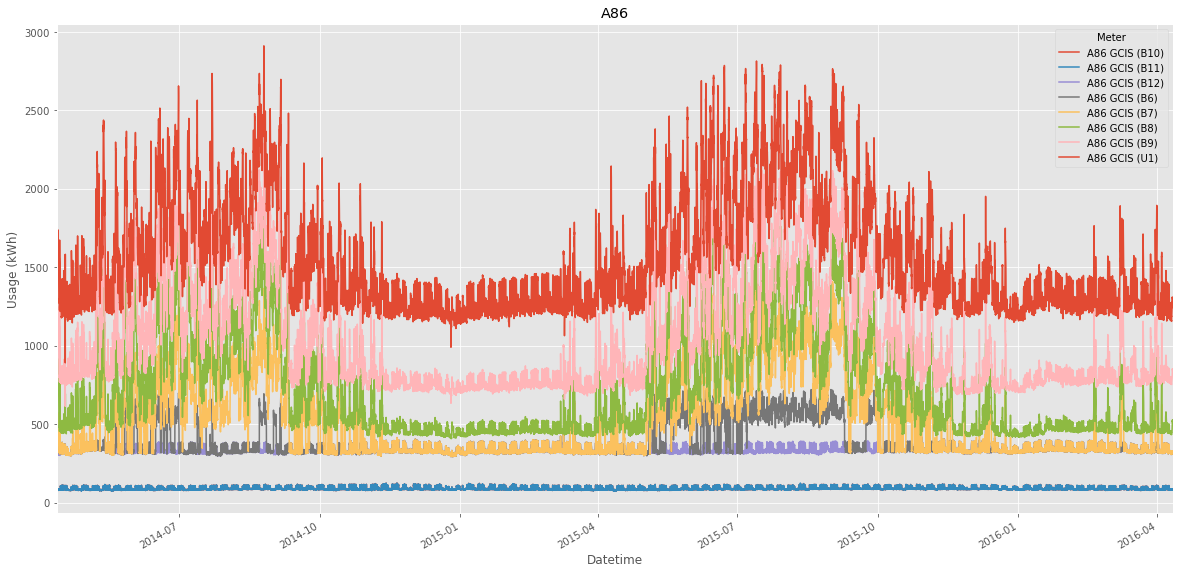

In [21]:
single_building_meters_stack('A86')

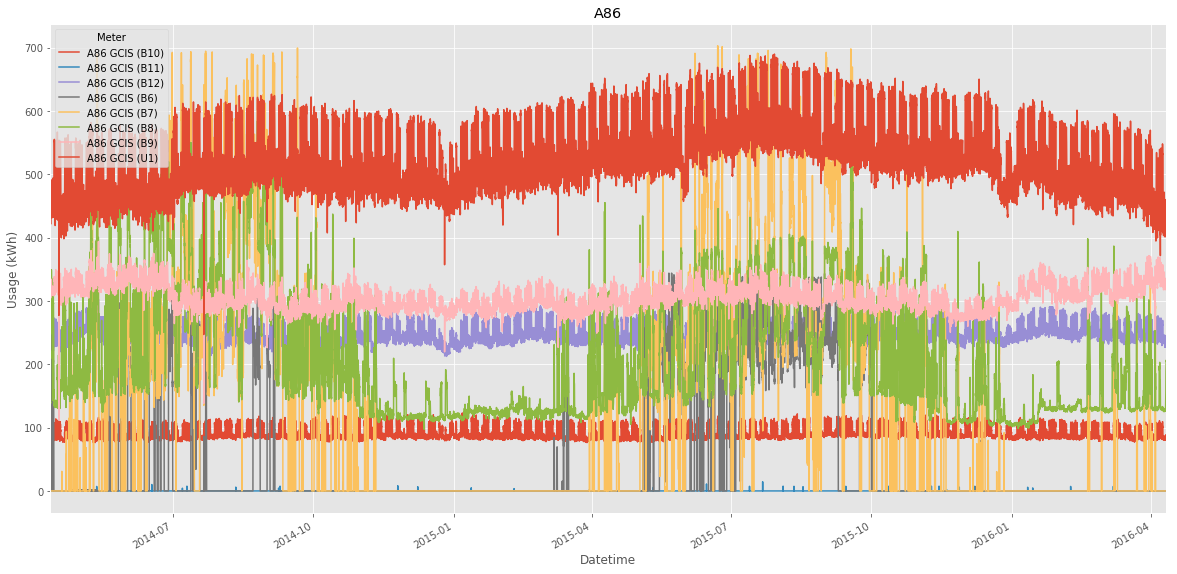

In [22]:
single_building_meters_overlay('A86')

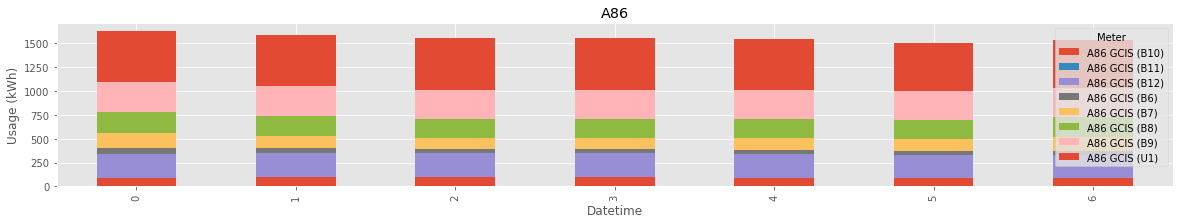

In [23]:
building_meters_weekday_stack('A86')

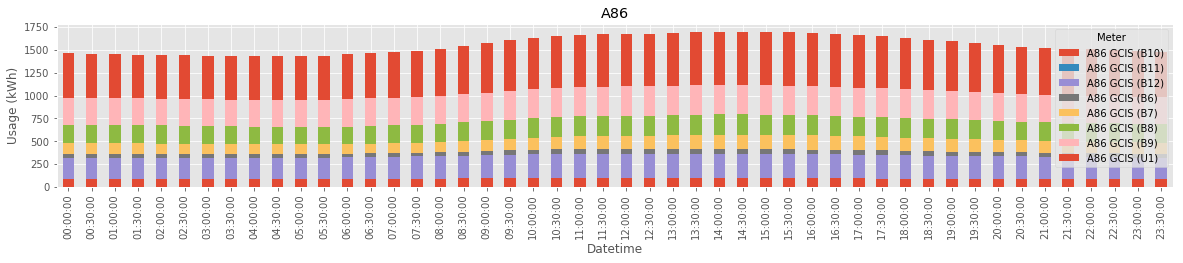

In [24]:
building_meters_time_stack('A86')

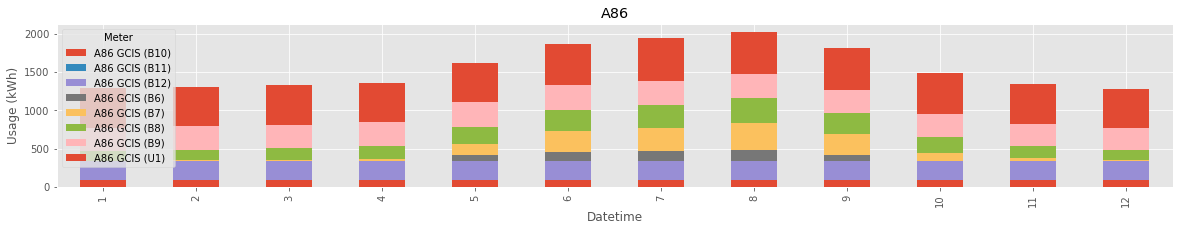

In [25]:
building_meters_month_stack('A86')

## Cummings

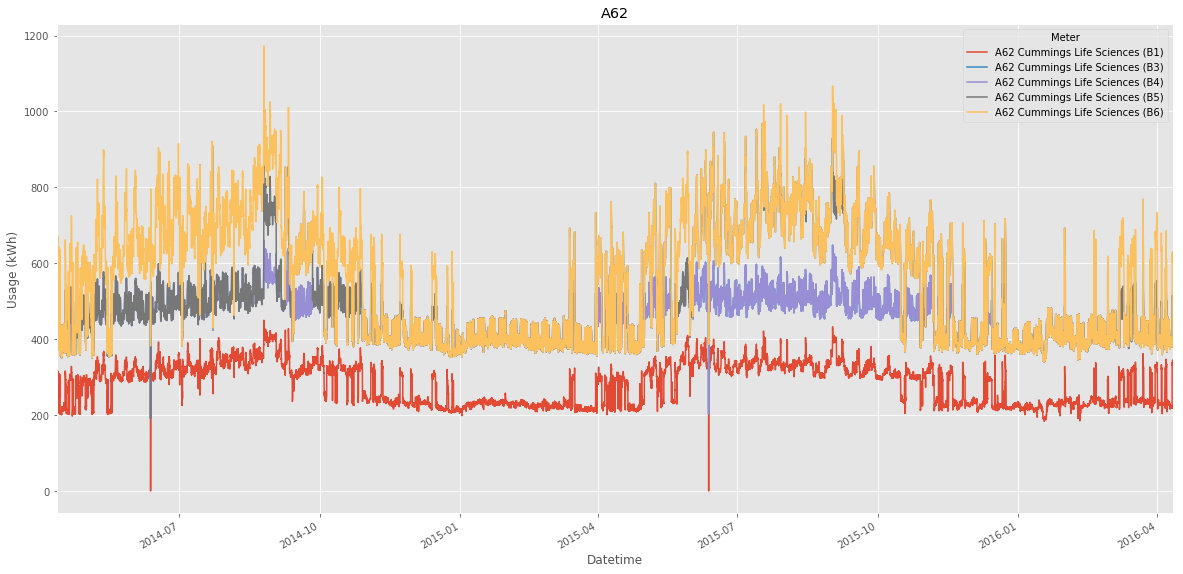

In [22]:
single_building_meters_stack('A62')

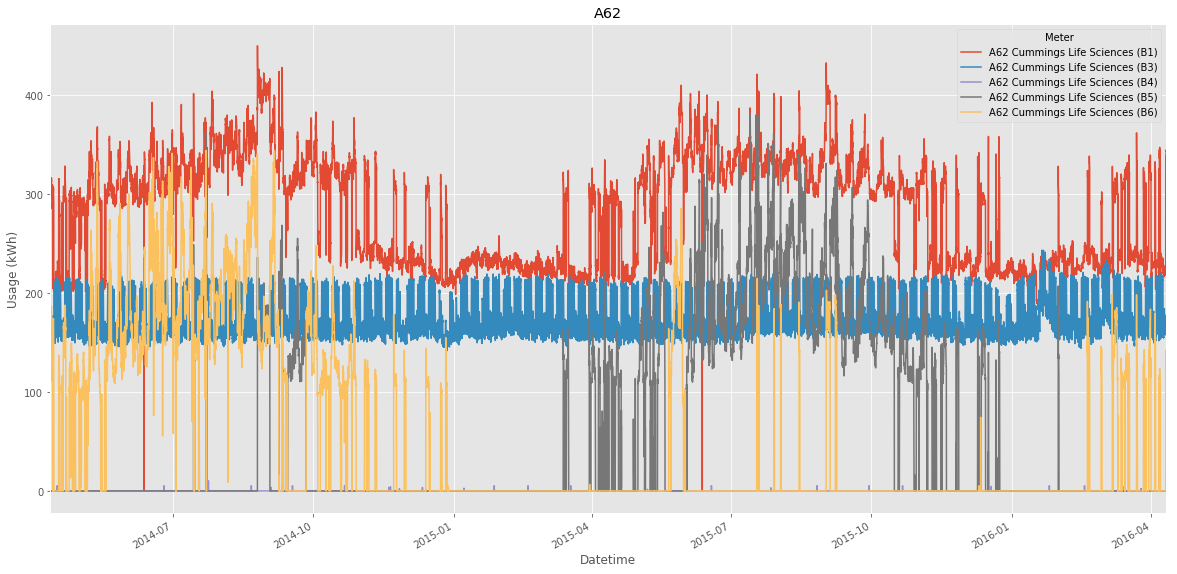

In [27]:
single_building_meters_overlay('A62')

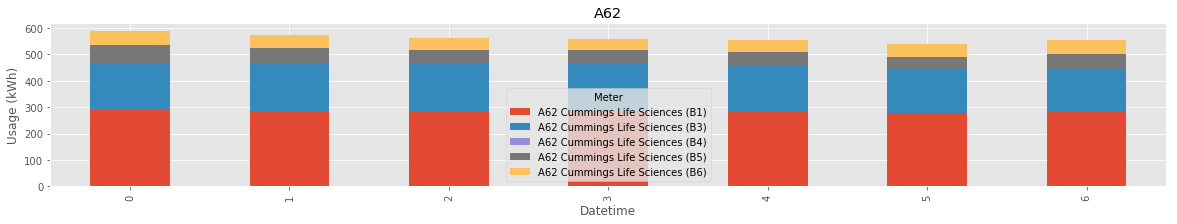

In [28]:
building_meters_weekday_stack('A62')

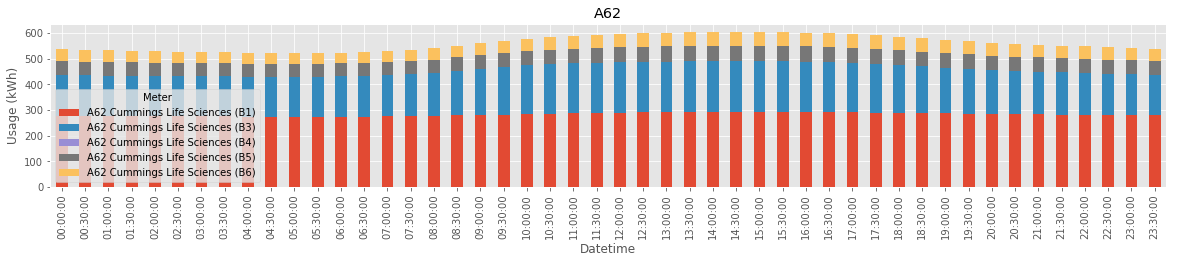

In [29]:
building_meters_time_stack('A62')

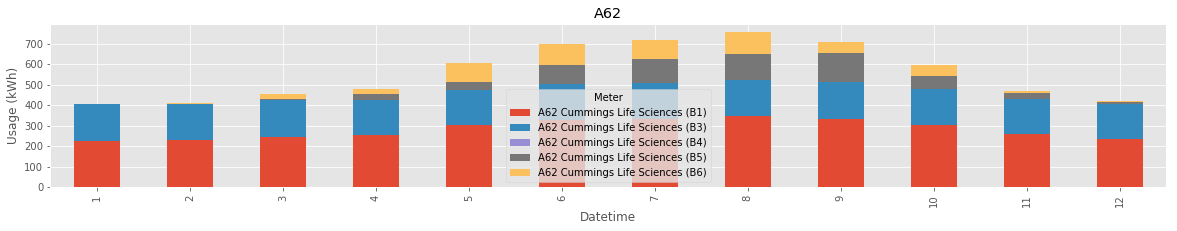

In [30]:
building_meters_month_stack('A62')

## Regenstein

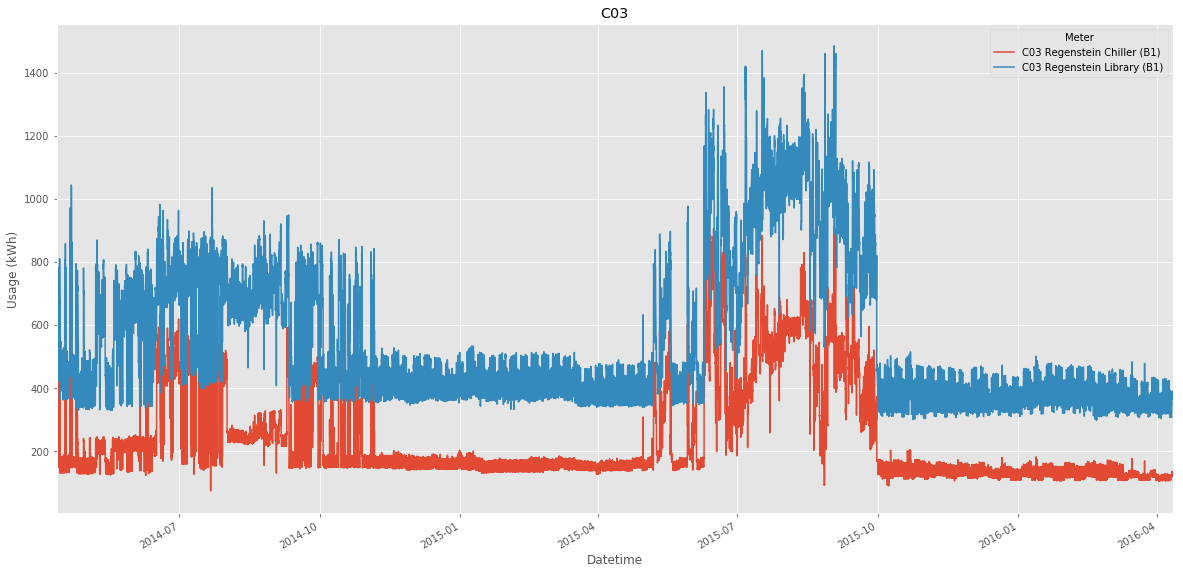

In [31]:
single_building_meters_stack('C03')

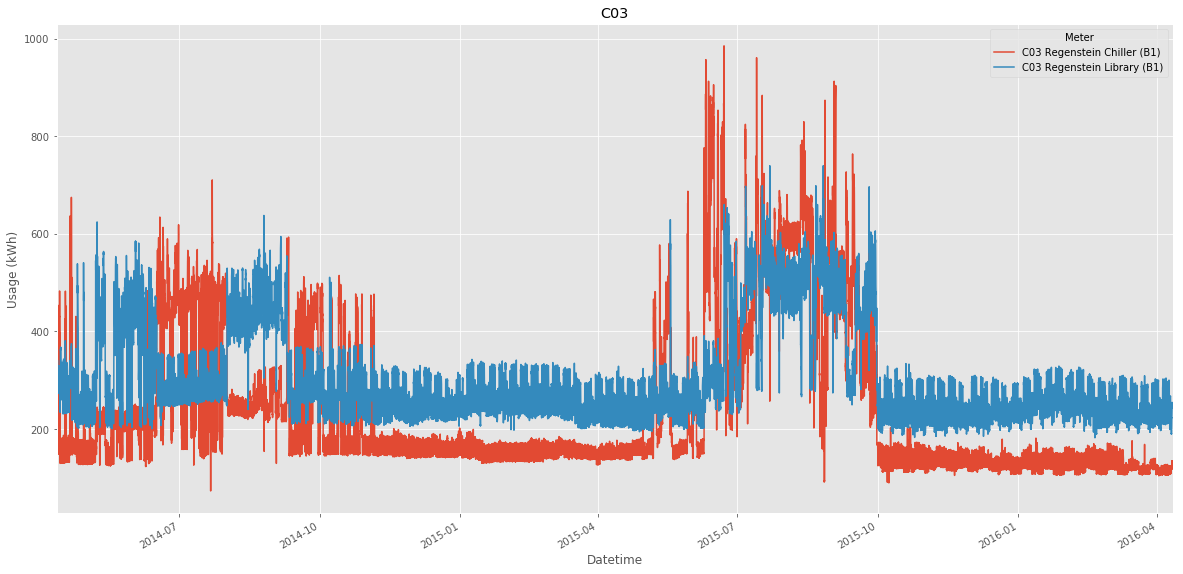

In [32]:
single_building_meters_overlay('C03')

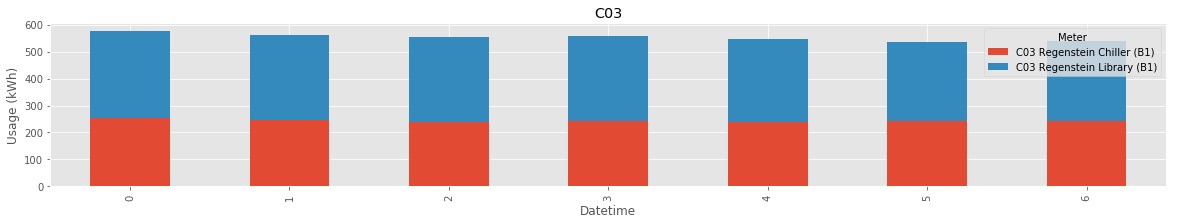

In [33]:
building_meters_weekday_stack('C03')

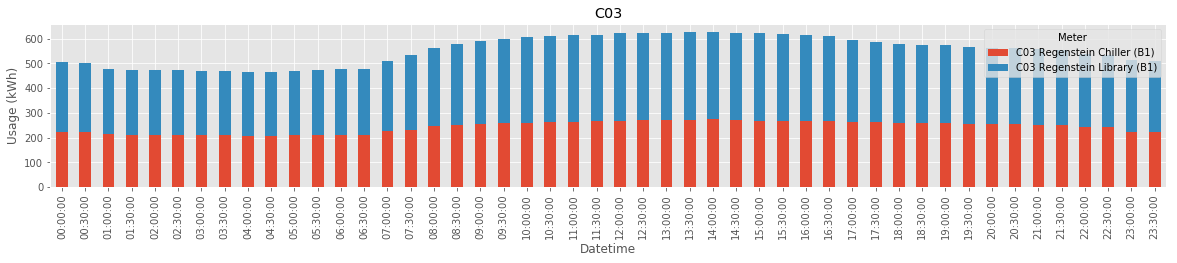

In [34]:
building_meters_time_stack('C03')

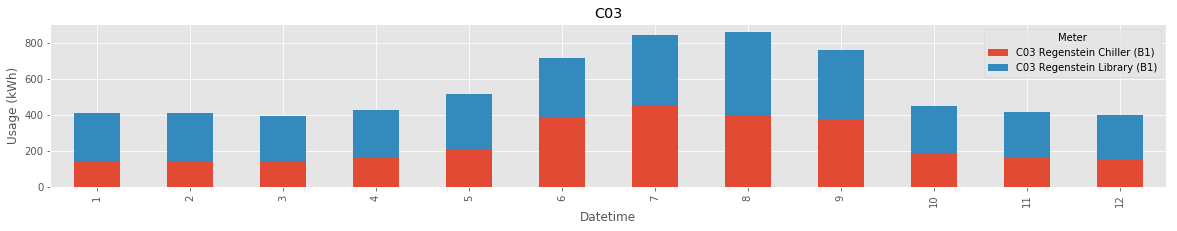

In [35]:
building_meters_month_stack('C03')

## BSLC

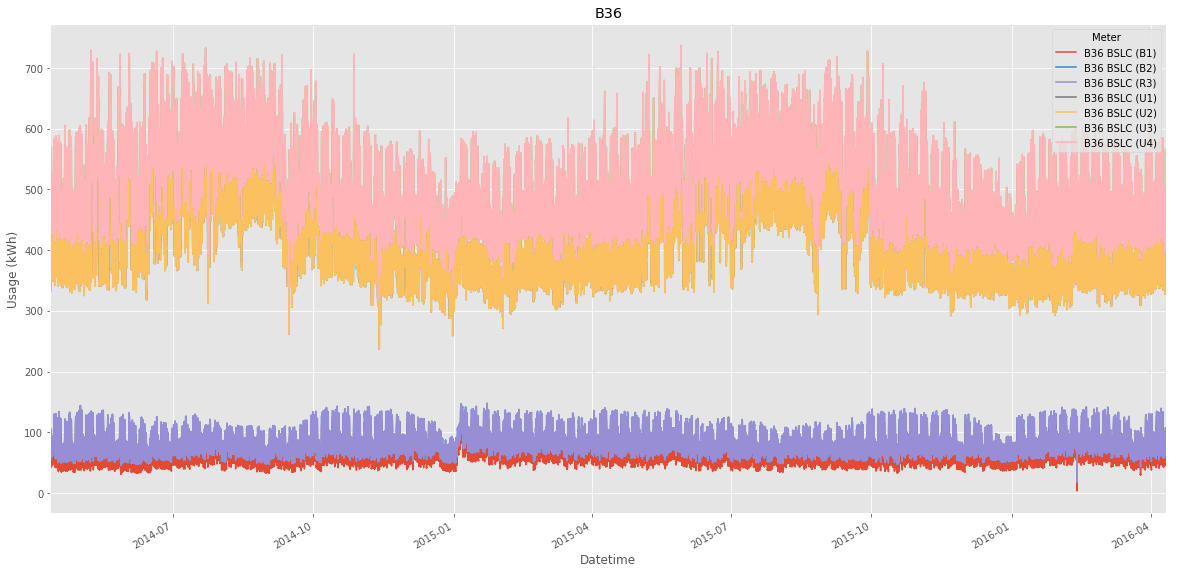

In [36]:
single_building_meters_stack('B36')

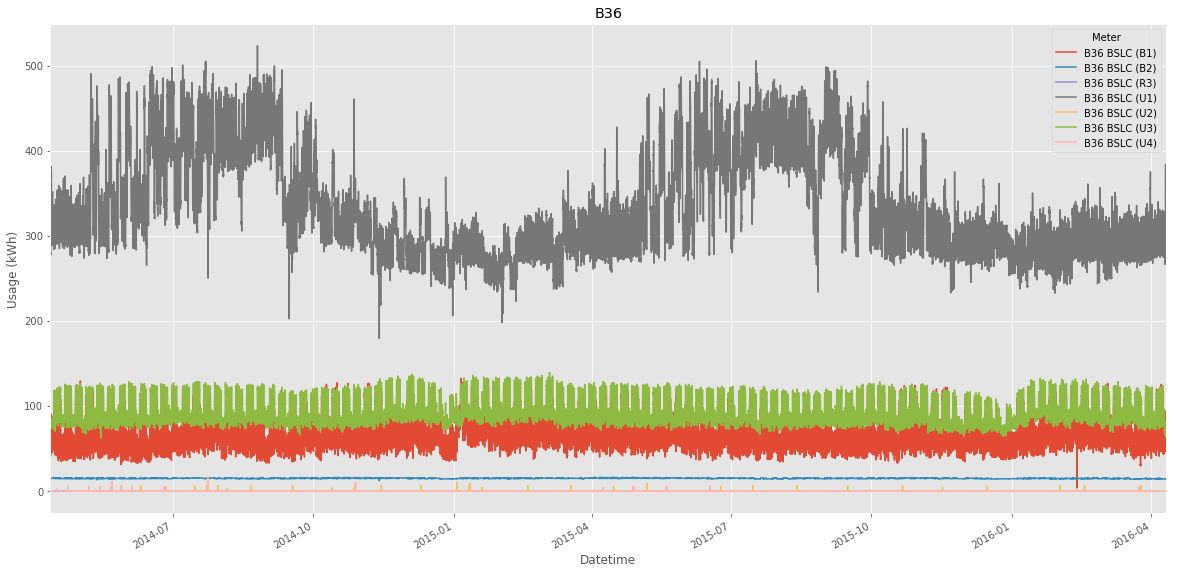

In [37]:
single_building_meters_overlay('B36')

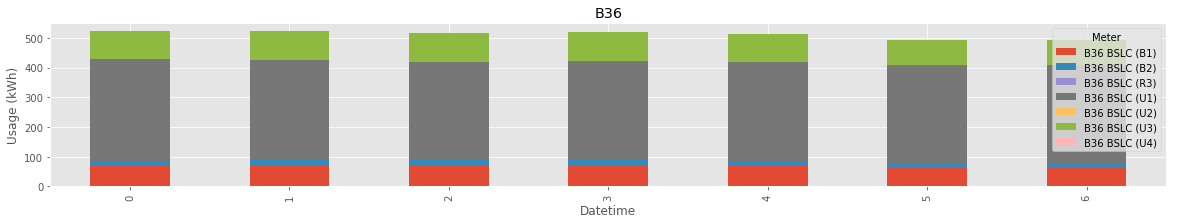

In [38]:
building_meters_weekday_stack('B36')

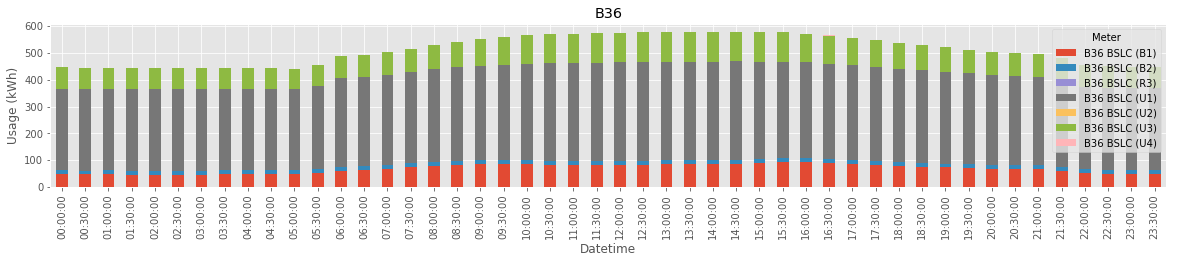

In [39]:
building_meters_time_stack('B36')

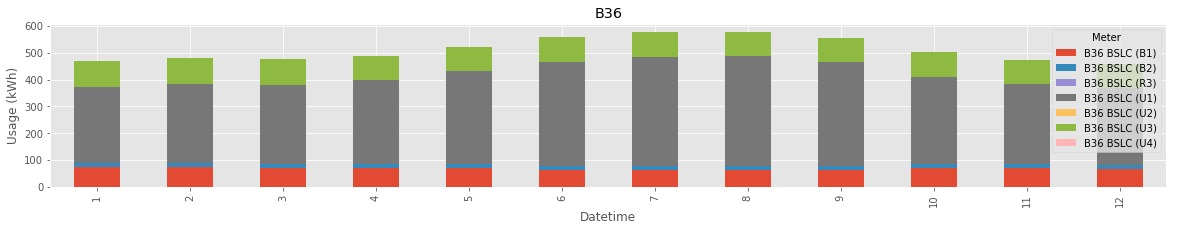

In [40]:
building_meters_month_stack('B36')

## Booth

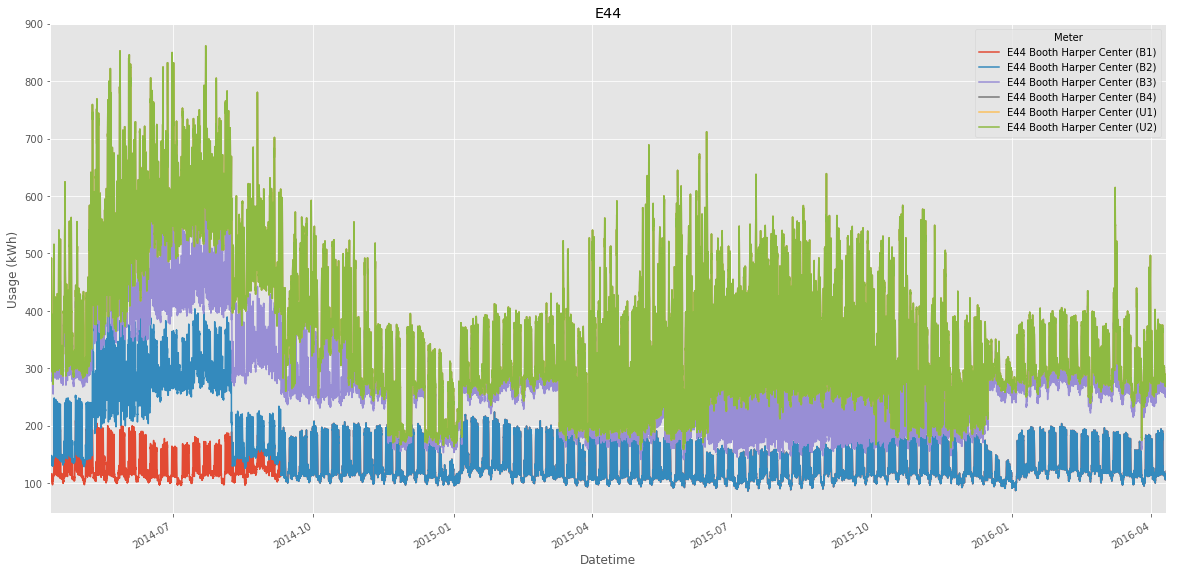

In [41]:
single_building_meters_stack('E44')

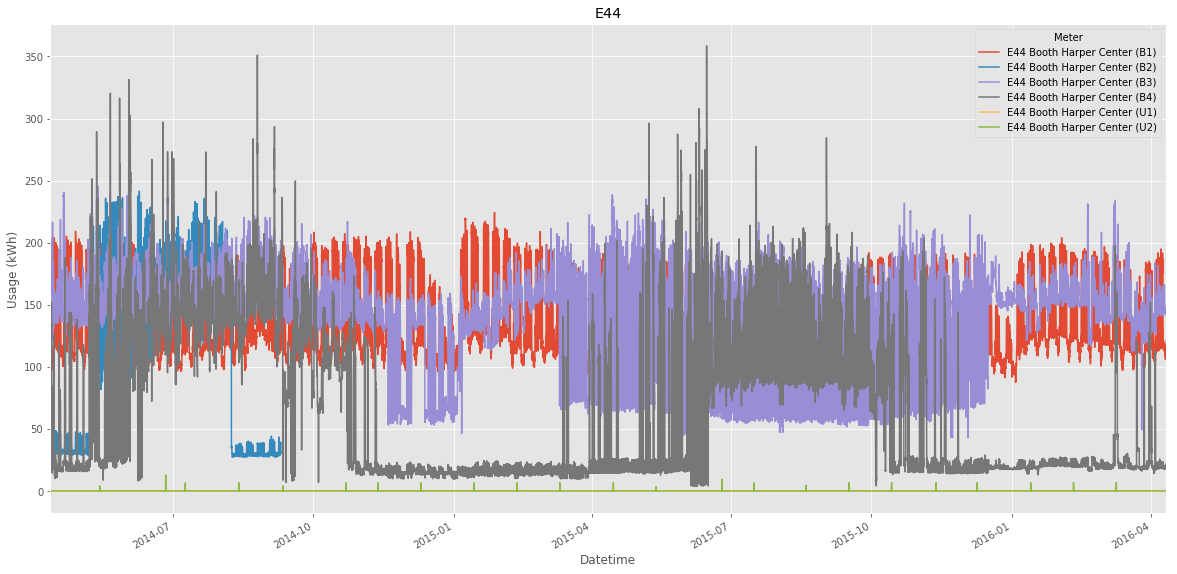

In [42]:
single_building_meters_overlay('E44')

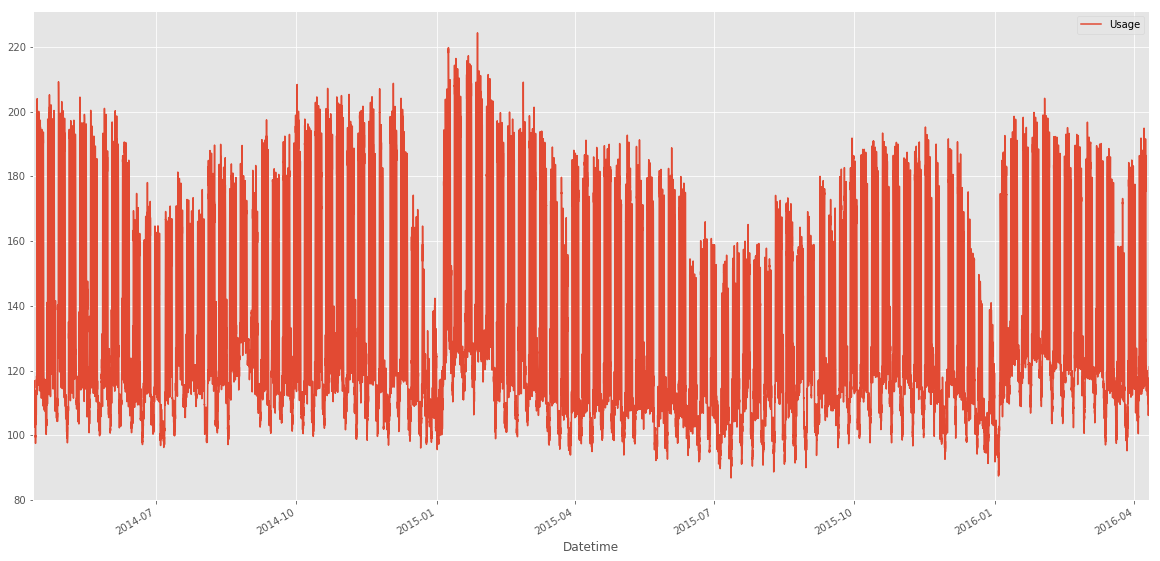

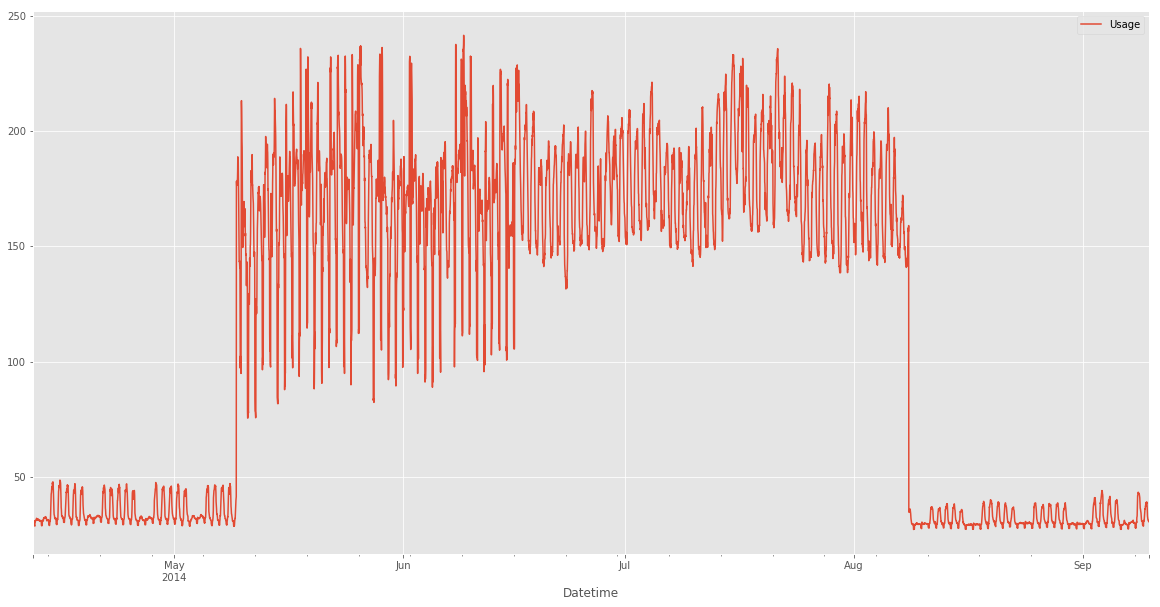

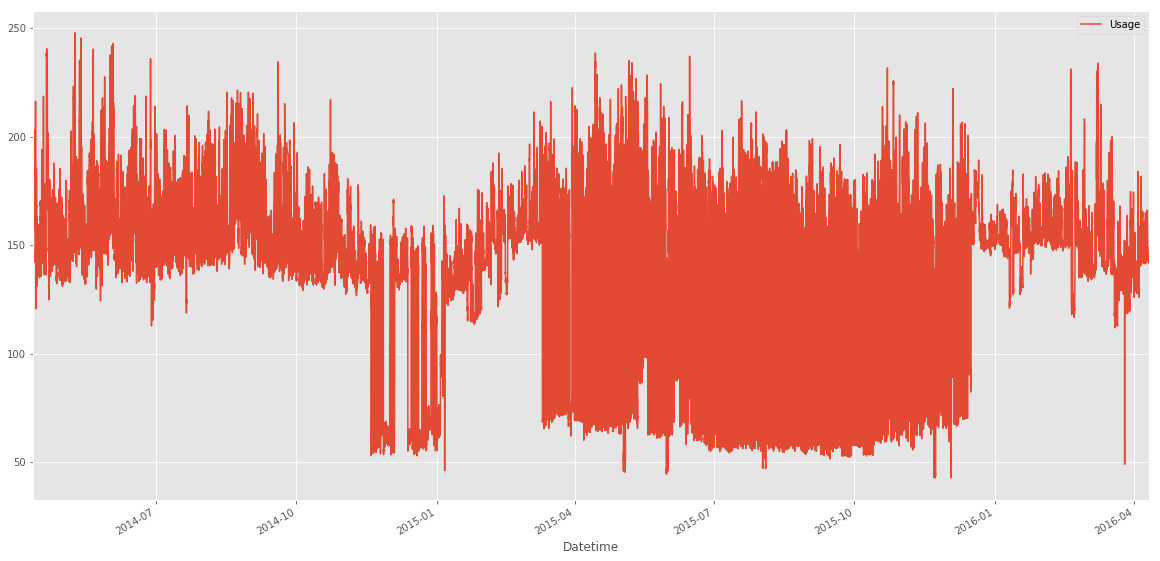

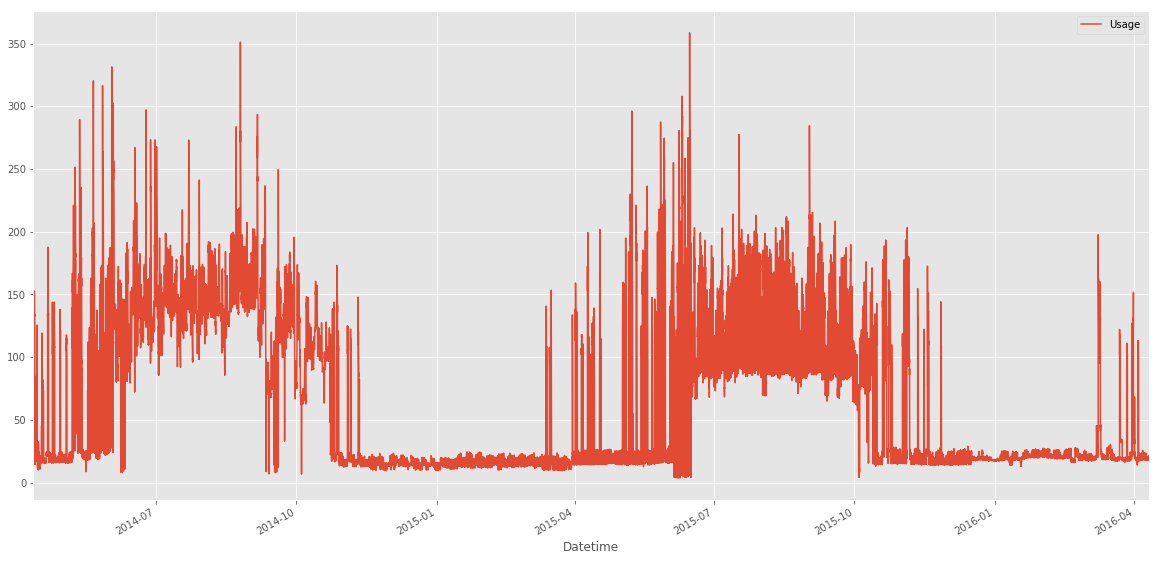

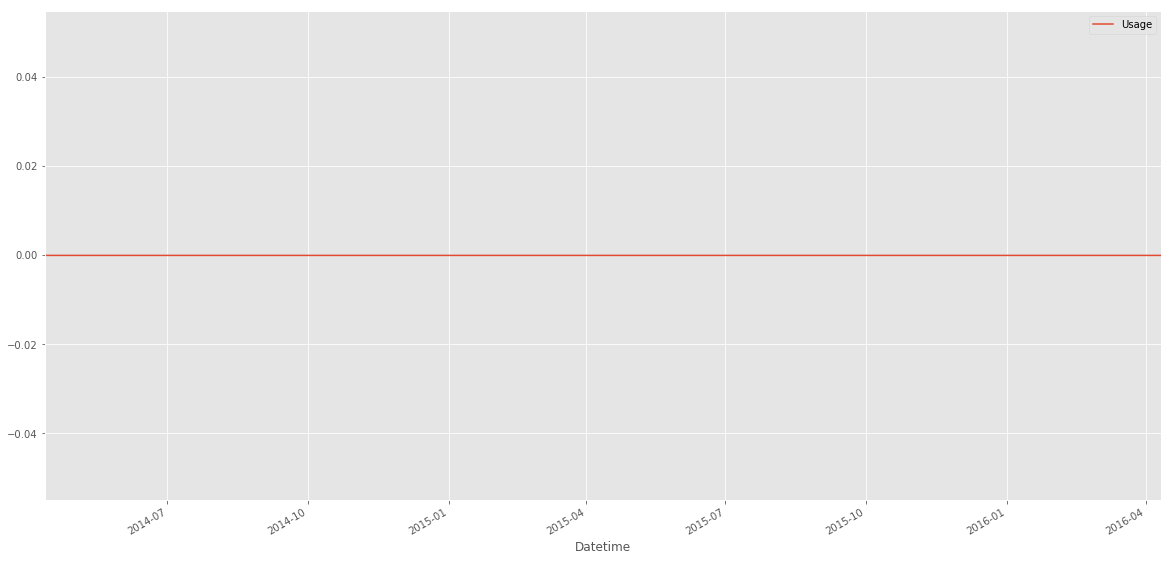

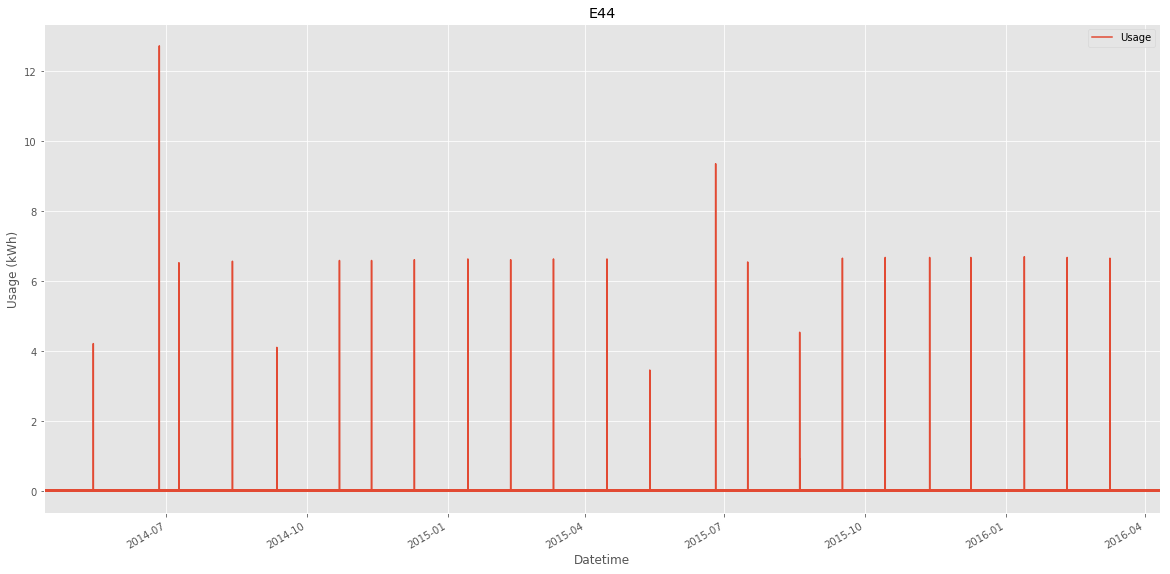

In [21]:
single_building_meters('E44')

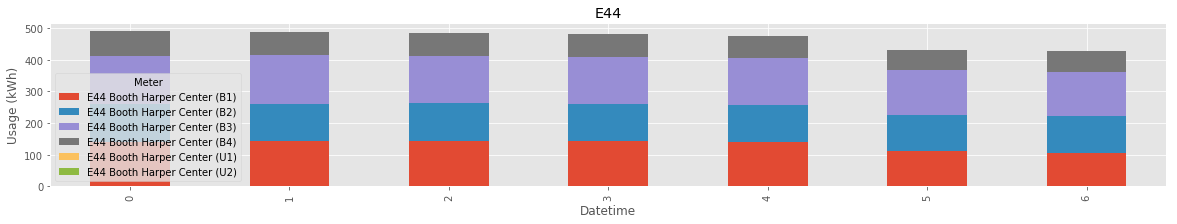

In [43]:
building_meters_weekday_stack('E44')

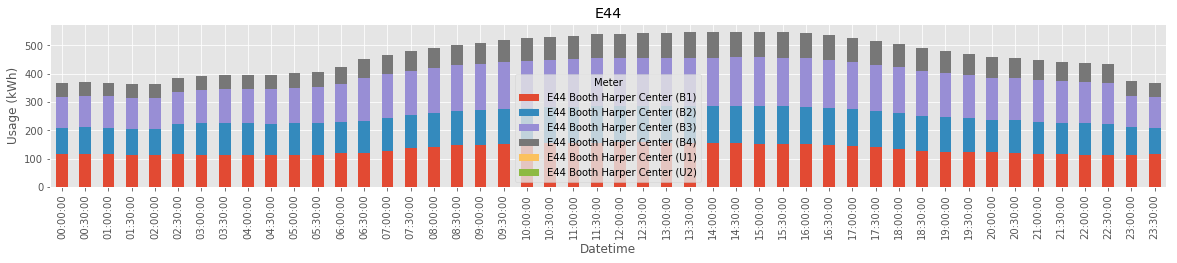

In [44]:
building_meters_time_stack('E44')

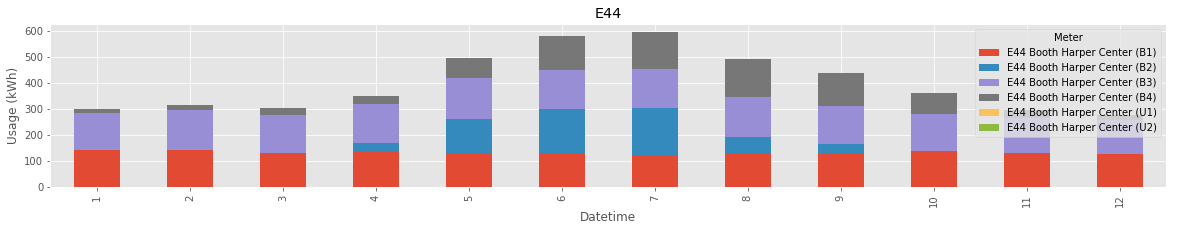

In [45]:
building_meters_month_stack('E44')

## Jones

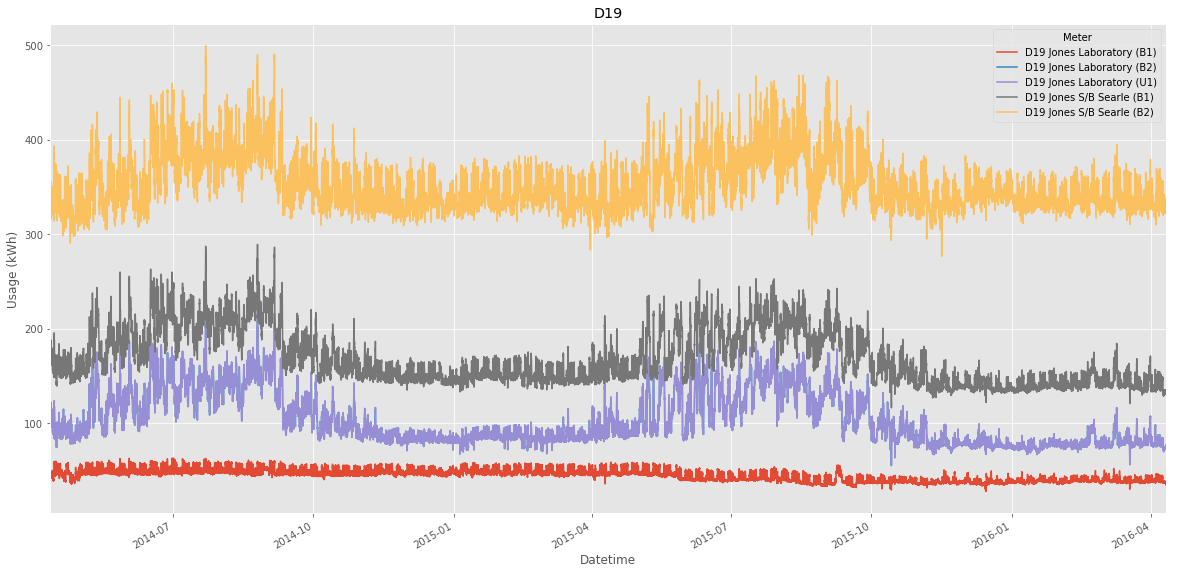

In [46]:
single_building_meters_stack('D19')

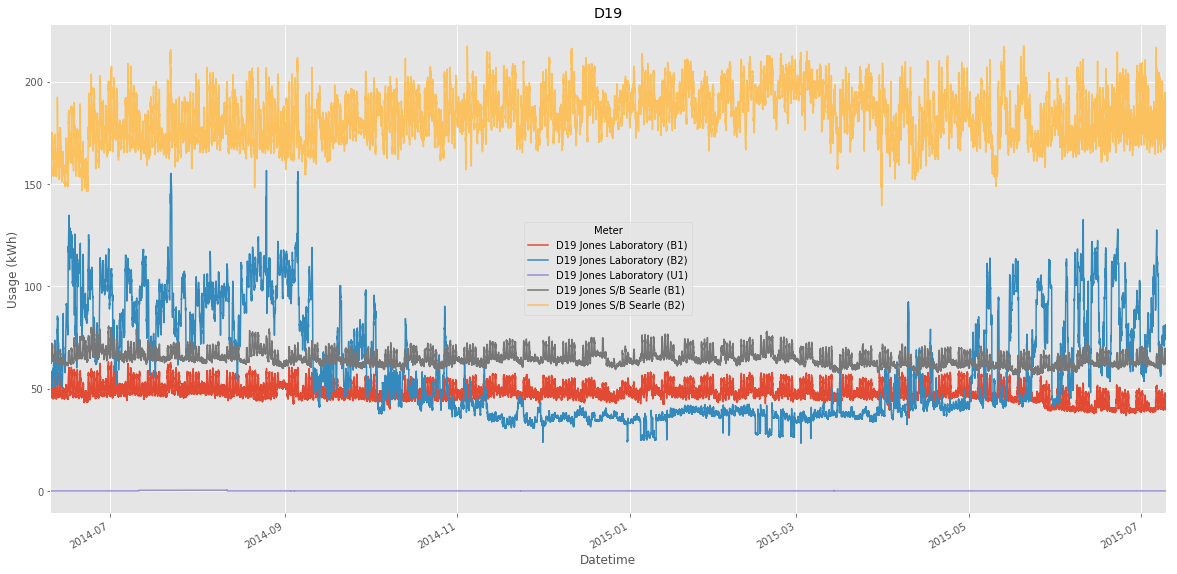

In [47]:
single_building_meters_overlay('D19', '2014-06-10 00:00:00', '2015-07-10 00:00:00')

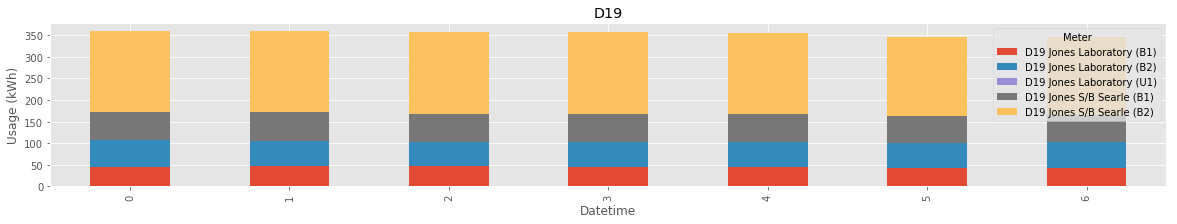

In [48]:
building_meters_weekday_stack('D19')

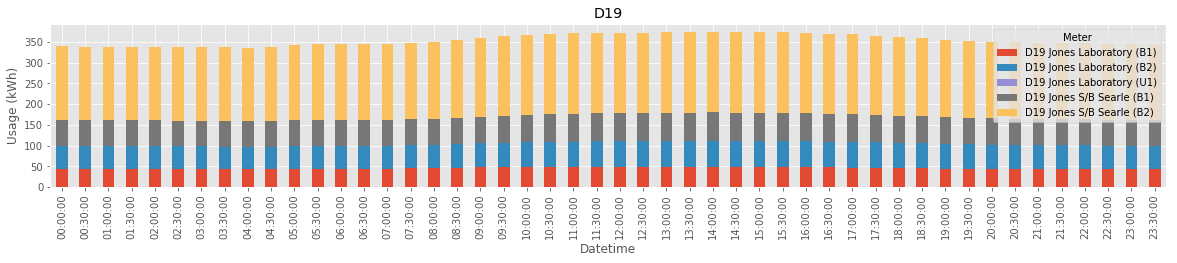

In [49]:
building_meters_time_stack('D19')

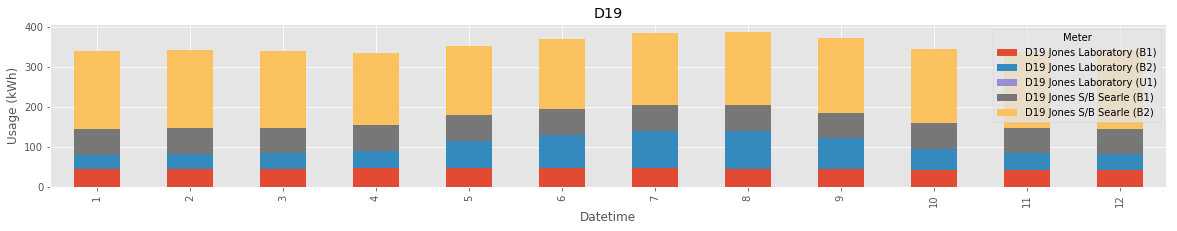

In [50]:
building_meters_month_stack('D19')

## Hinds

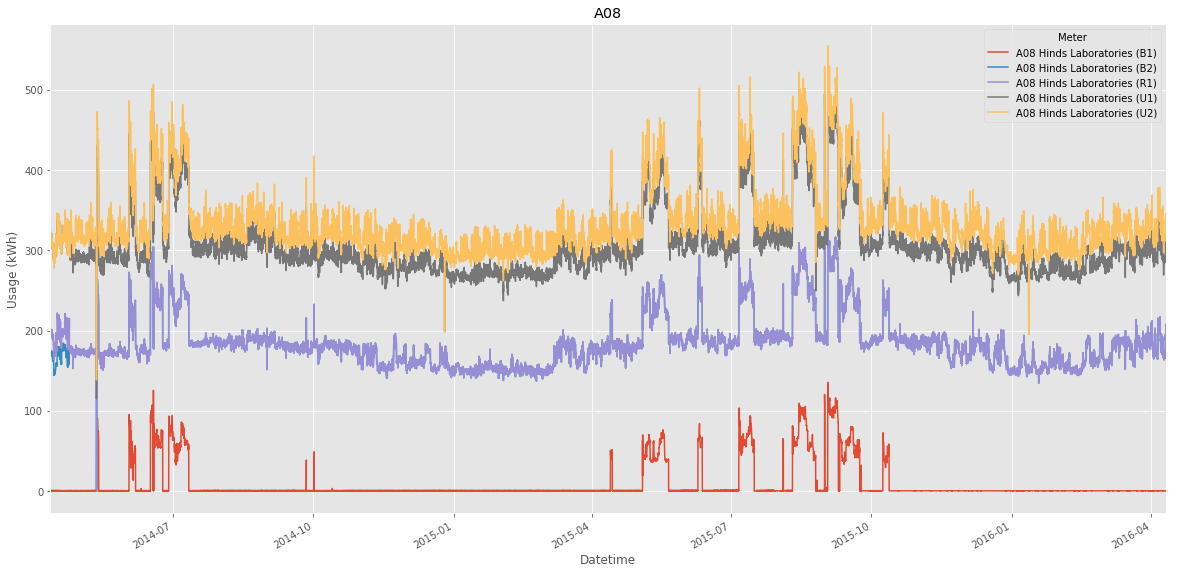

In [51]:
single_building_meters_stack('A08')

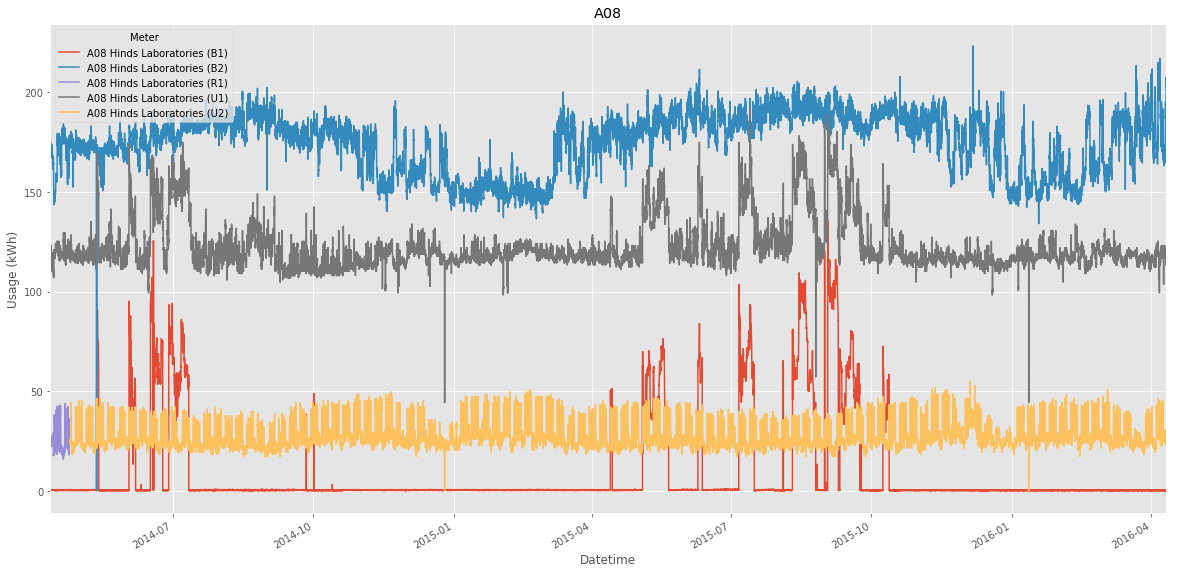

In [52]:
single_building_meters_overlay('A08')

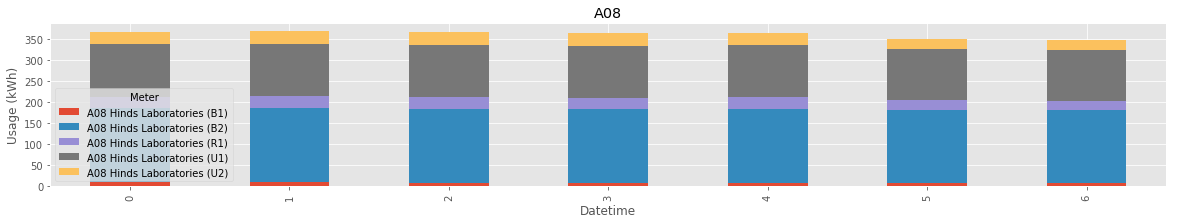

In [53]:
building_meters_weekday_stack('A08')

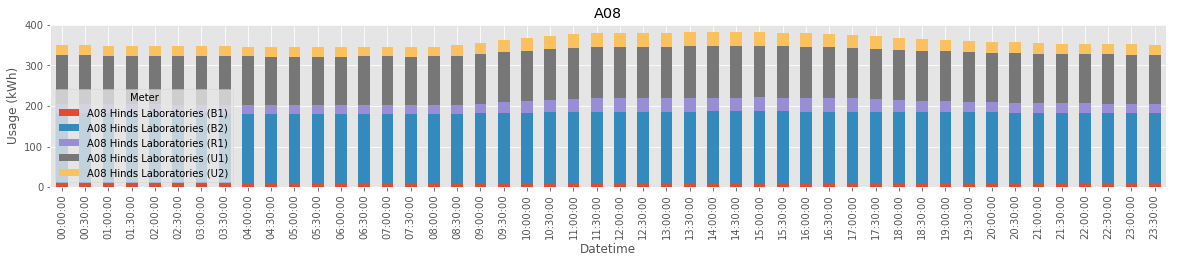

In [54]:
building_meters_time_stack('A08')

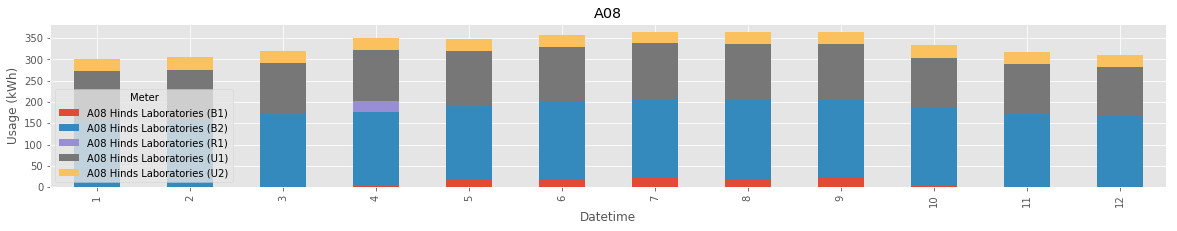

In [55]:
building_meters_month_stack('A08')

## Saieh - LEED Gold

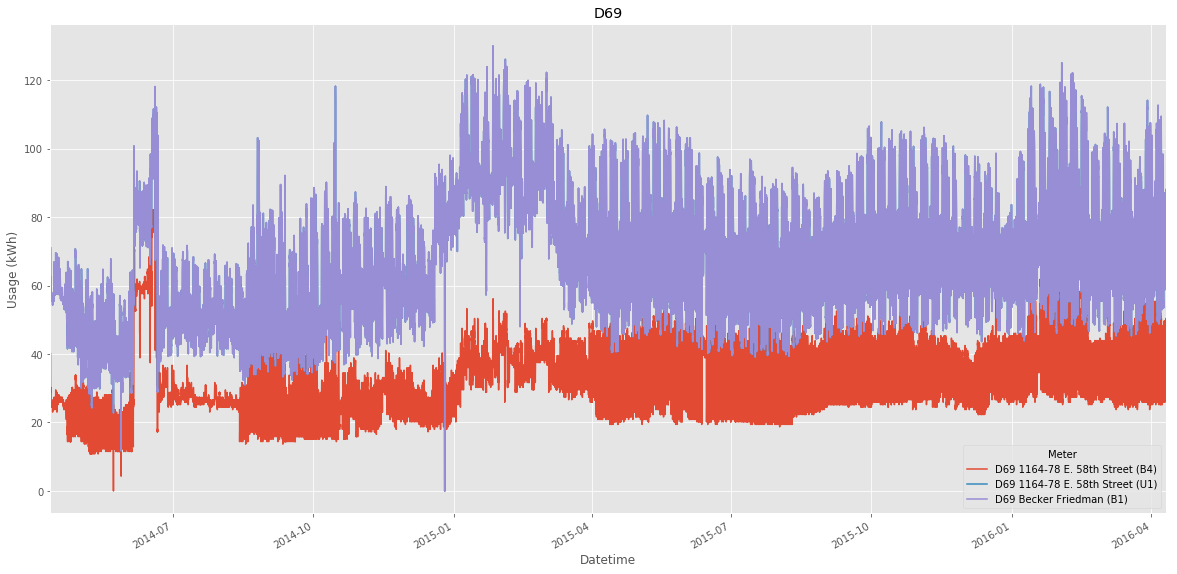

In [56]:
single_building_meters_stack('D69')

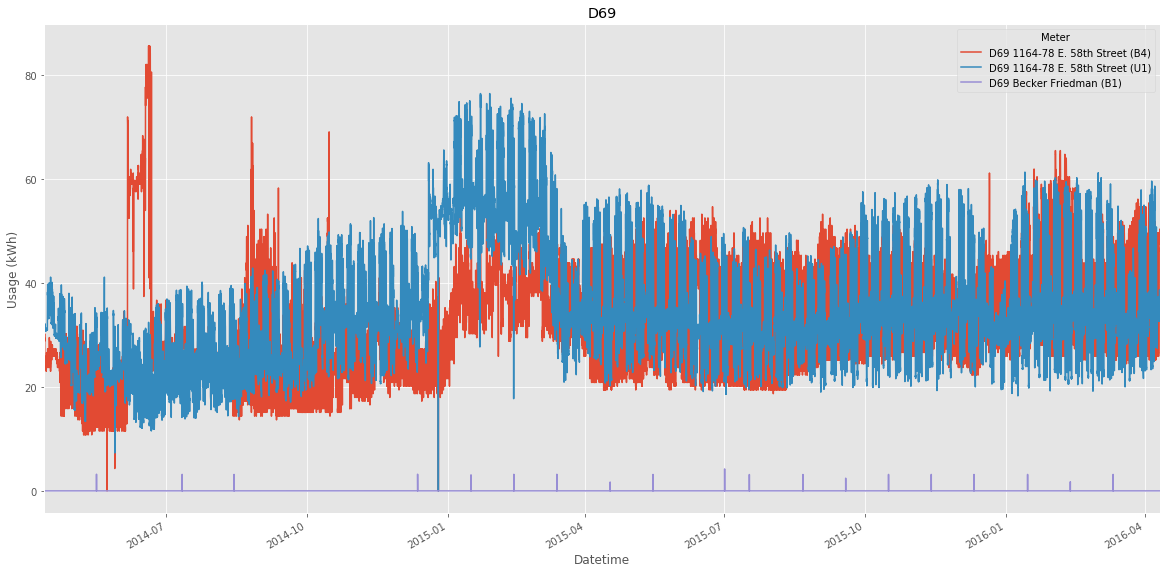

In [23]:
single_building_meters_overlay('D69')

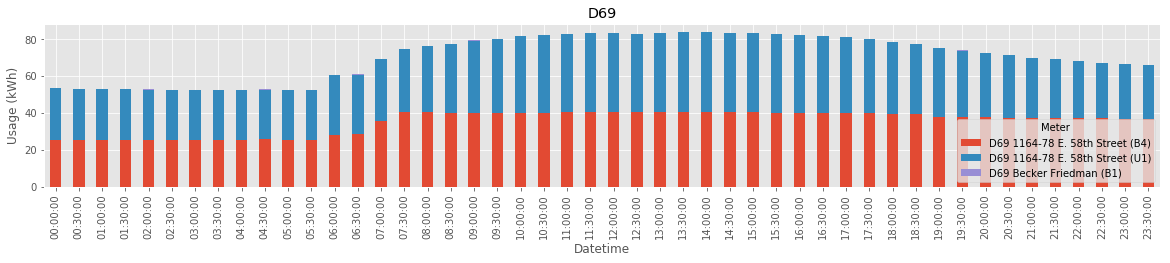

In [57]:
building_meters_time_stack('D69')

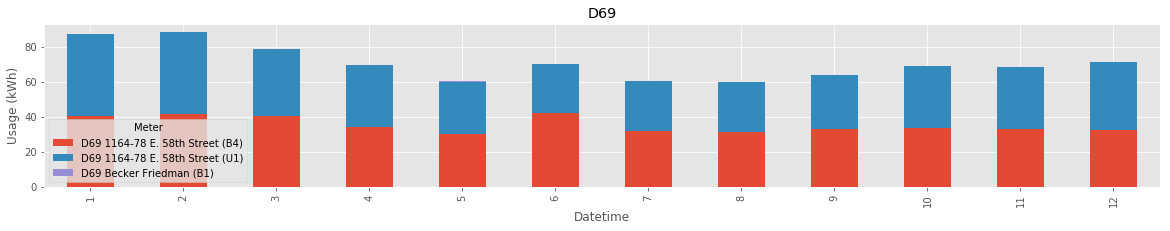

In [58]:
building_meters_month_stack('D69')

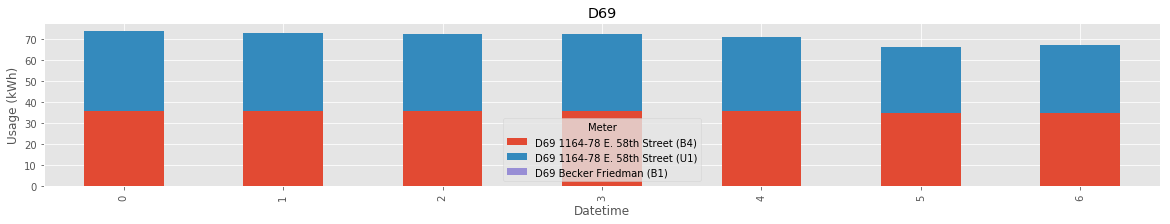

In [59]:
building_meters_weekday_stack('D69')

## Logan Center - LEED Gold

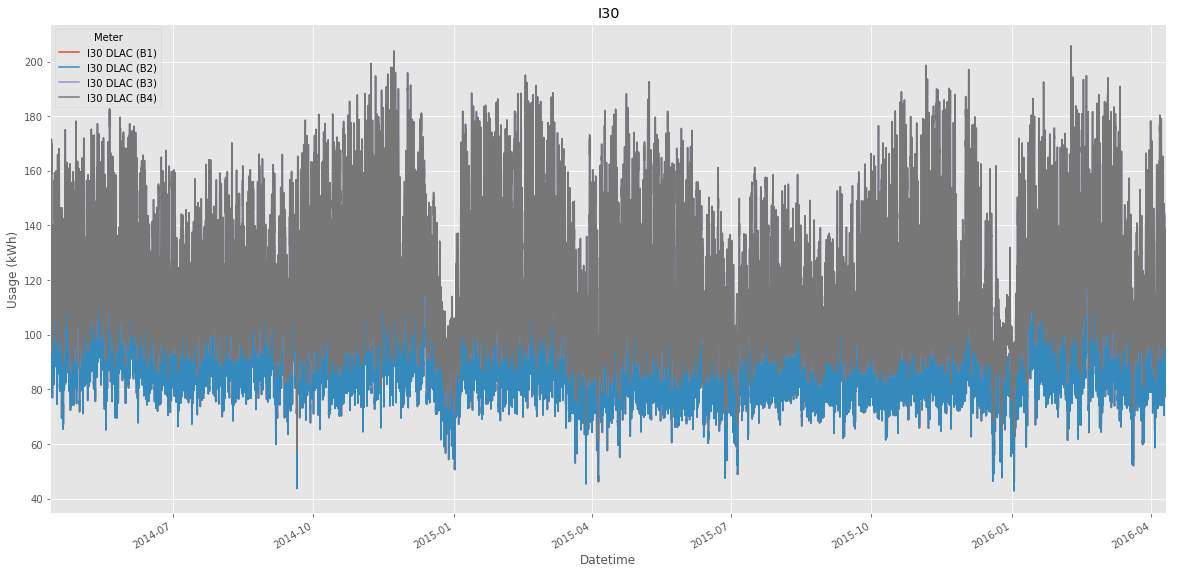

In [60]:
single_building_meters_stack('I30')

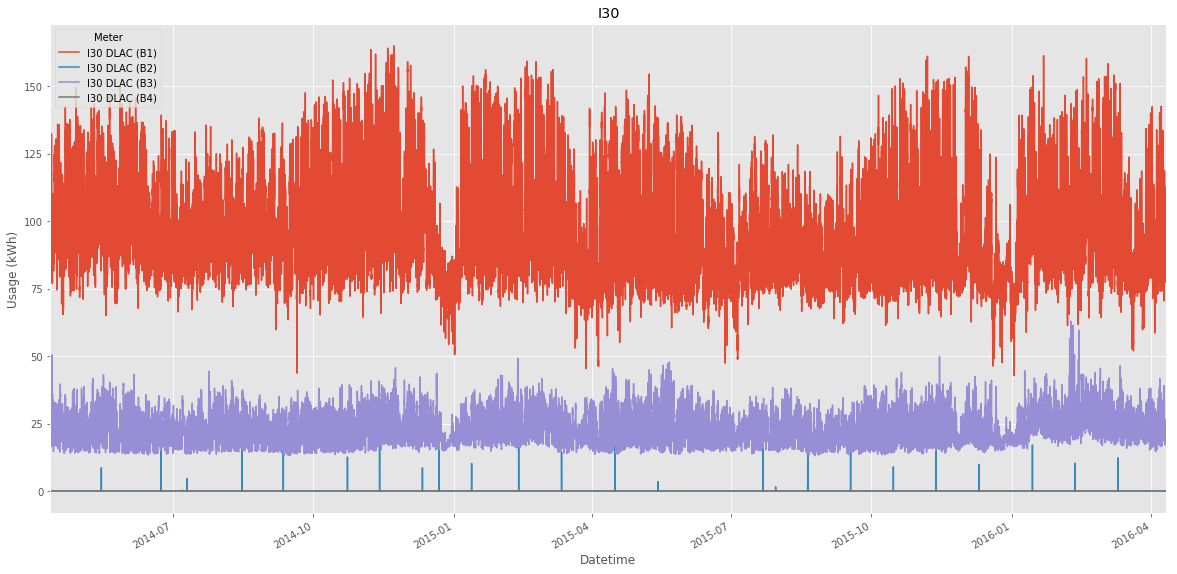

In [61]:
single_building_meters_overlay('I30')

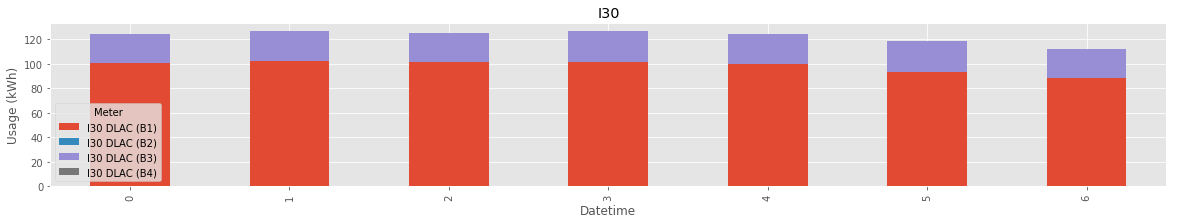

In [62]:
building_meters_weekday_stack('I30')

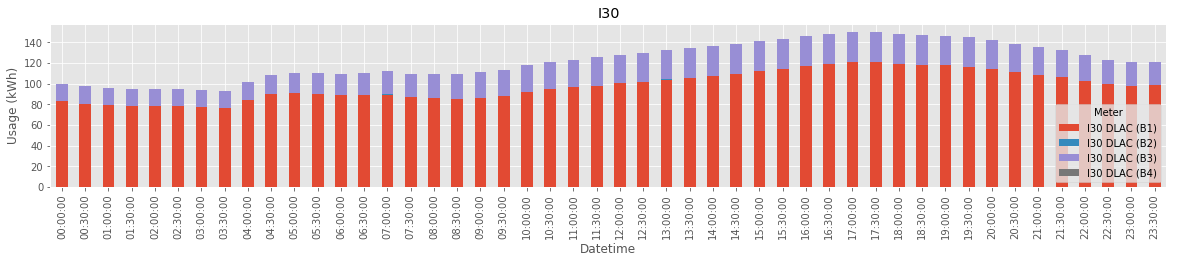

In [63]:
building_meters_time_stack('I30')

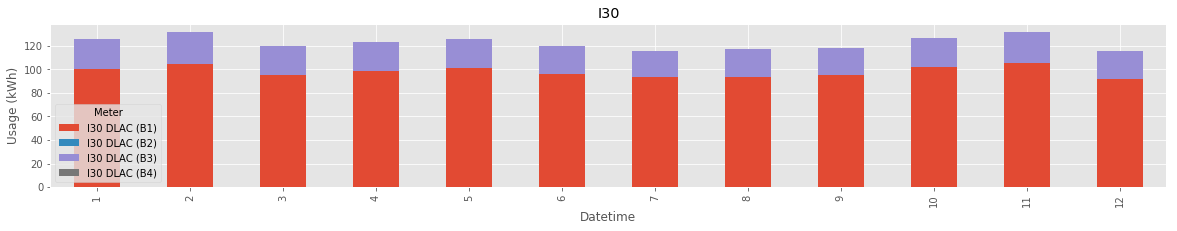

In [64]:
building_meters_month_stack('I30')

## Burton-Judson

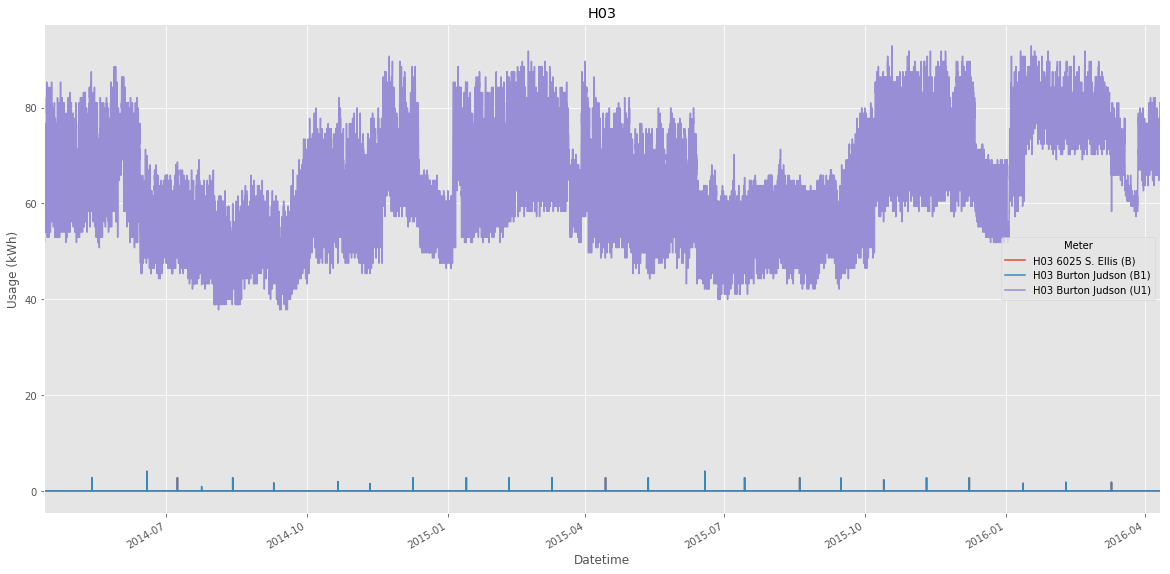

In [65]:
single_building_meters_stack('H03')

In [ ]:
single_building_meters_overlay('H03')

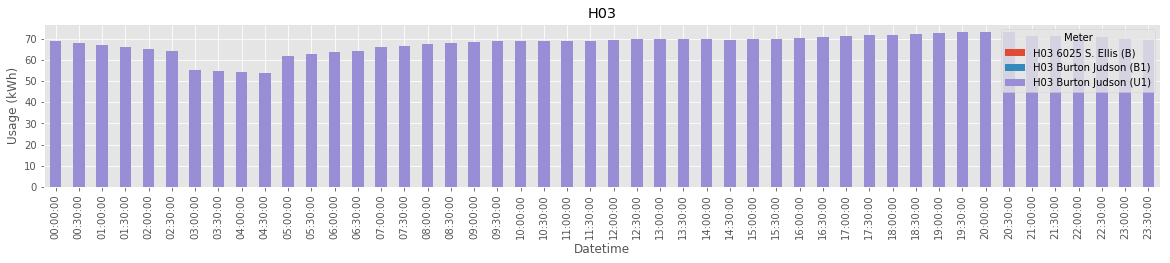

In [66]:
building_meters_time_stack('H03')

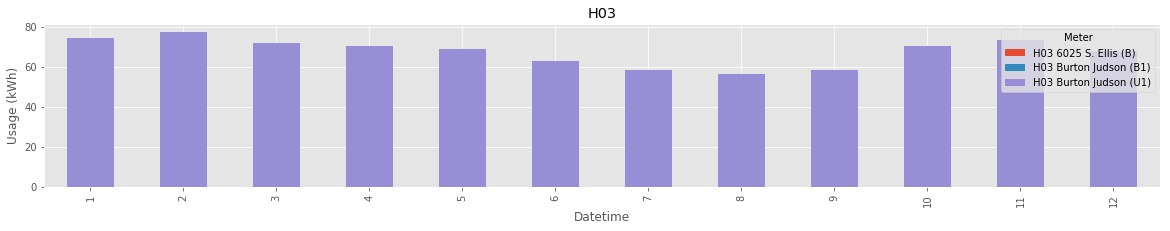

In [67]:
building_meters_month_stack('H03')

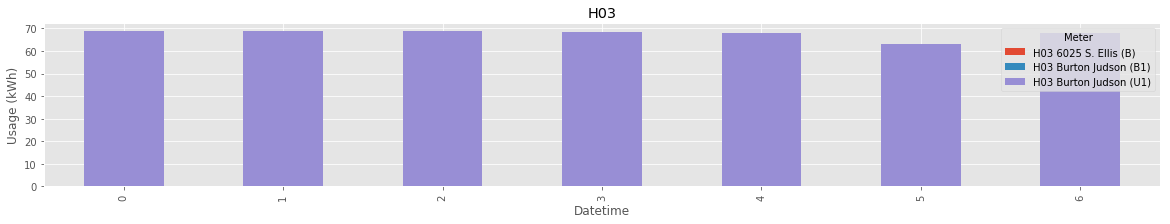

In [68]:
building_meters_weekday_stack('H03')

## Max Palevsky

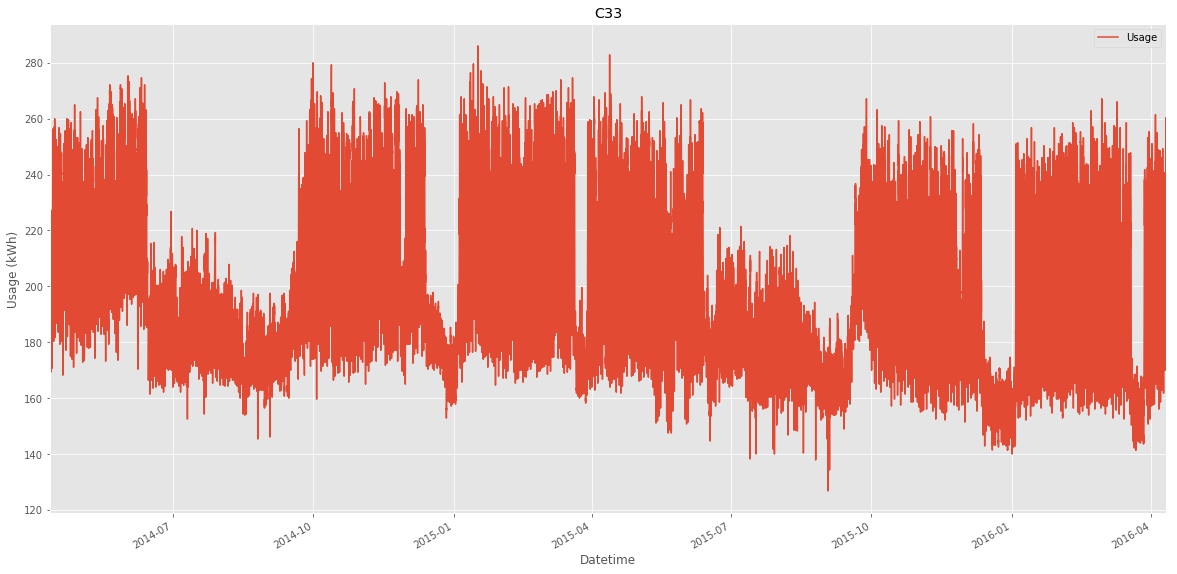

In [69]:
single_building('C33')

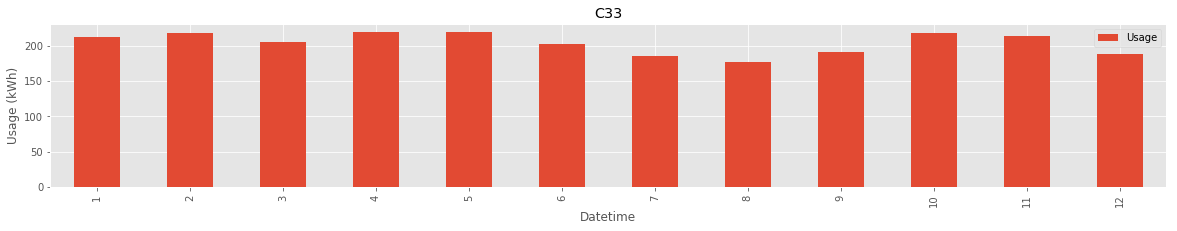

In [70]:
single_building_month('C33')

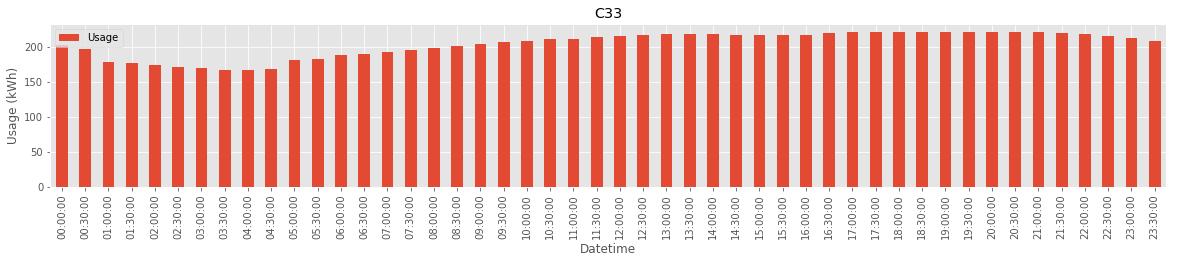

In [71]:
single_building_time('C33')

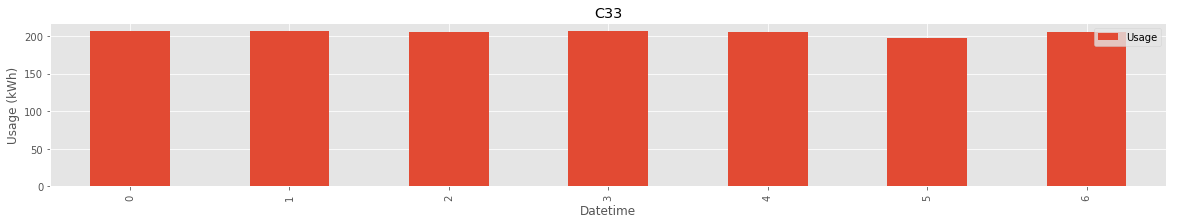

In [72]:
single_building_weekday('C33')

## Rockefeller

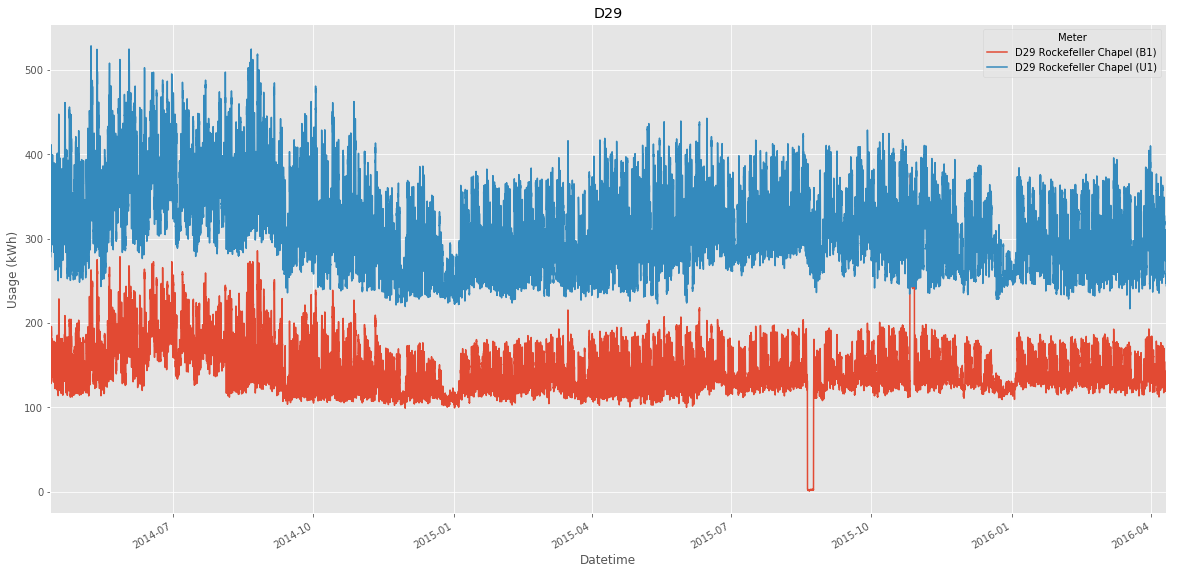

In [73]:
single_building_meters_stack('D29')

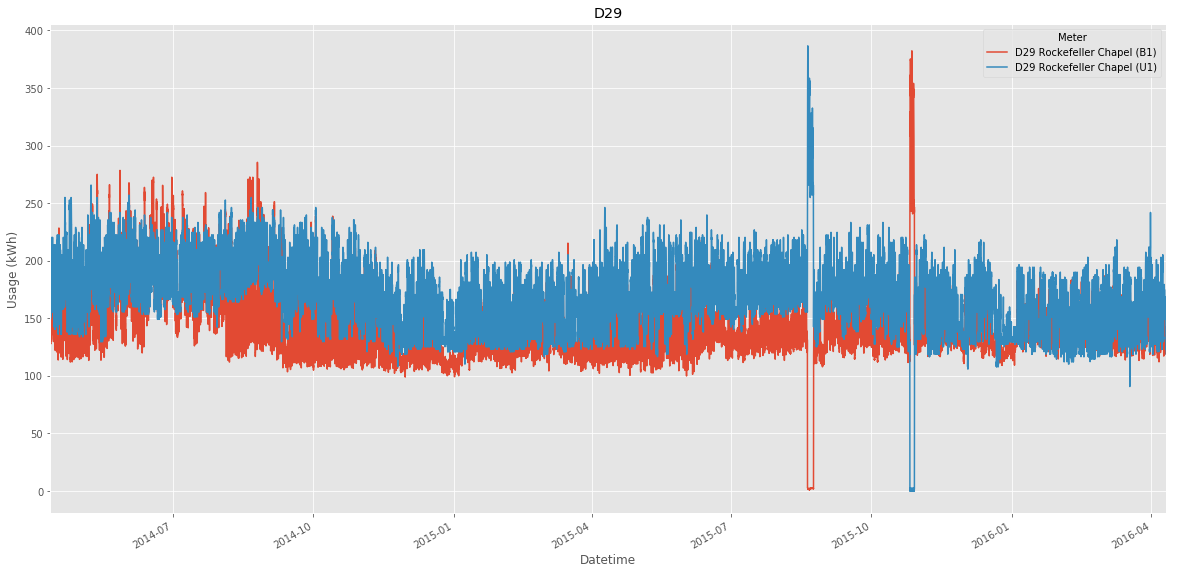

In [74]:
single_building_meters_overlay('D29')

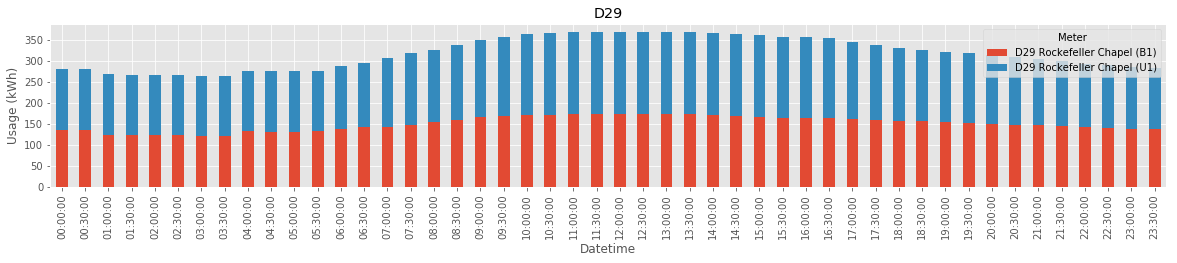

In [75]:
building_meters_time_stack('D29')

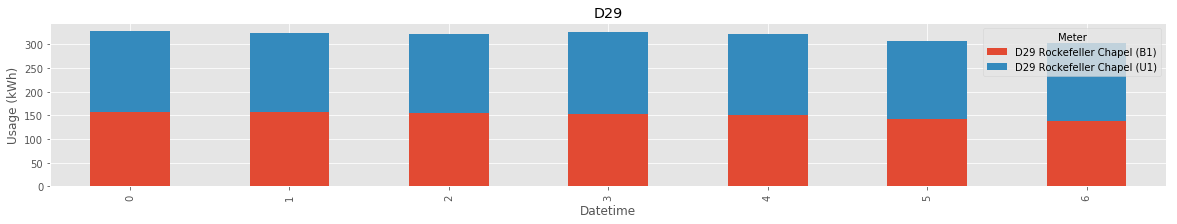

In [76]:
building_meters_weekday_stack('D29')

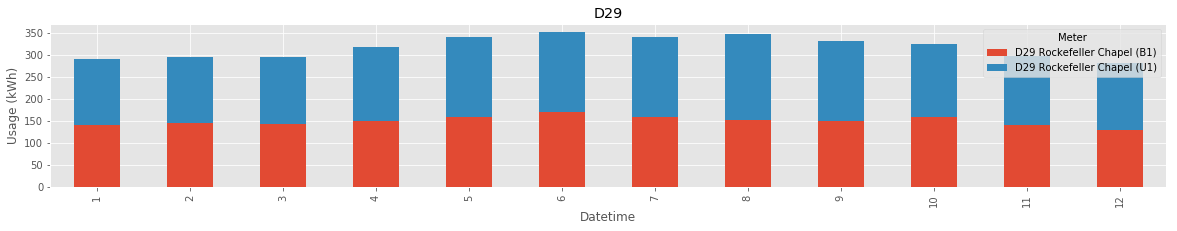

In [77]:
building_meters_month_stack('D29')

## Kersten

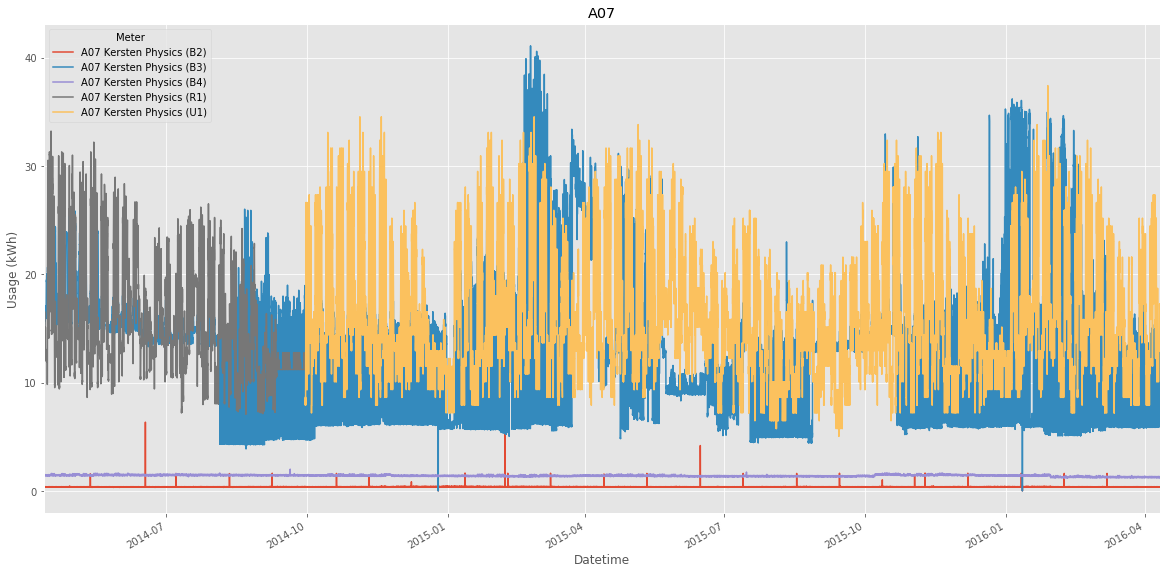

In [32]:
single_building_meters_overlay('A07')

In [24]:
electric.Meter.unique()

array(['A06 Crerar Library (B1)', 'F02 Steam Plant (B1)',
       'G02 Capin Hall (B1)', 'D36 Social Science Building (B1)',
       'H01 Computers 1155 Building (B1)', 'A11 Kovler Laboratories (B1)',
       'A08 Hinds Laboratories (R1)', 'A84 American School (B1)',
       'A62 Cummings Life Sciences (B1)', 'A13 Bookstore (B1)',
       'H02 Law School (B1)', 'A22 Carlson Animal Research (B4)',
       'F02 Steam Plant (B2)', 'C02 Crown Field House (B1)',
       'E21 Breckinridge House (B1)', 'D14 Center Gender Studies (B1)',
       'L07 5482 S. Greenwood Ave (R1)', 'D25 Walker Museum (R1)',
       'D25 Walker Museum (R2)', 'I13 Woodlawn Social Service (B1)',
       'D53 Pick Hall (R1)', 'N11 ATS (B1)',
       'B34 Stagg Field Building (B1)', 'D16 Eckhart/Ryerson (B1)',
       'D16 Eckhart/Ryerson (B2)', 'C31 54th & Ellis Parking (B1)',
       'C31 54th & Ellis Parking (B2)', 'D20 Levi Hall (B1)',
       'I10 6022-24 S. Drexel (B3)', 'B36 BSLC (B1)',
       'A50 MRS Building (CLSC) (B1)', 